In [1]:
# you will first need to install rebound
# run:
# pip install wheel
# pip install rebound
# then above, click Kernal-> Restart + Clear output.
# this will reinitialize the Kernal with rebound installed.

# for you later: examples of using rebound can be found here: 
# https://reboundx.readthedocs.io/en/latest/python_quickstart.html

<Figure size 432x288 with 0 Axes>

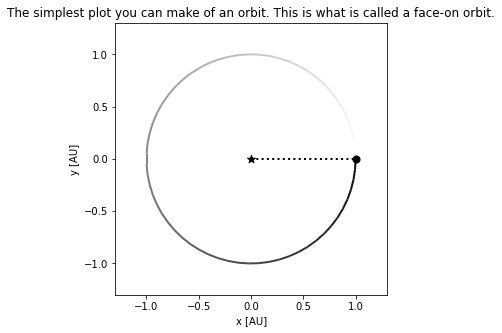

In [8]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u

def to_radians(value):
    return (value*u.deg).to(u.rad).value

sim = rebound.Simulation()
sim.units = ('yr', 'AU', 'Msun') # set our units to years, astronomical units, and solar masses.
# lets initialize an alien solar system. The central star will be 1 solar mass, and 
# the companion will be 1/10 of that (about 100 jupiter masses). This is a low mass stellar companion, not a planet.
sim.add(m=1.)
sim.add(m=1/10, a=1., omega=to_radians(0), Omega=to_radians(0), e=0, inc=to_radians(0))

plt.figure()
fig = rebound.OrbitPlot(sim, unitlabel="[AU]", periastron=True, lw=2)
plt.title('The simplest plot you can make of an orbit. This is what is called a face-on orbit.')
plt.show()

## Here are the orbital elements for any orbit:
#### They are not very apparent at first glance. It is much better, in my opinion, to physically play around with these to SEE what they mean. The next cell does this. 

### Things to remember: The "plane of reference" here is the plane of the sky. I.e., imagine that the night sky is a tarp or a screen. Here on earth, we look at this screen. It is as if we are inside of a balloon, looking outward at the skin of the balloon from the inside. The skin of the balloon here is "the plane of the sky".

![title](Orbit.png)

<Figure size 432x288 with 0 Axes>

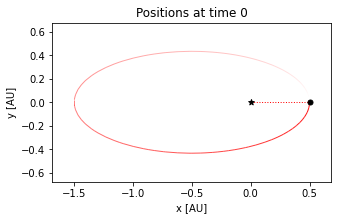

<Figure size 432x288 with 0 Axes>

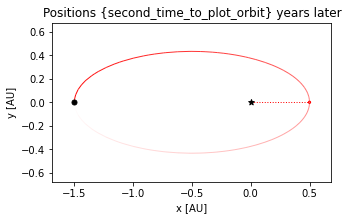

In [17]:
# Now lets visualize the motion
import time
import matplotlib.pyplot as plt


semi_major_axis = 1 # in AU. Has to be positive.
eccentricity = .5 # ranges from 0 to 0.9999999 (anything but 1)
argument_of_periapsis = 0 # ranges from 0 to 360 degrees. Note that periastron = periapsis interchangeably
longitude_of_ascending_node = 0 # ranges from 0 to 180 degrees.
inclination = 60 # ranges from 0 to 180 degrees.

first_time_to_plot_orbit = 0 # this points the planet AT periastron (closest approach)
second_time_to_plot_orbit = 0.5# years


# note: here is the documentation for sim.add:
# https://rebound.readthedocs.io/en/doctest/python_api.html#rebound.Orbit
#### Making a couple of plots.
sim = rebound.Simulation()
sim.dt = 0.001
sim.units = ('yr', 'AU', 'Msun') # set our units to years, astronomical units, and solar masses.
sim.add(m=1.)
sim.add(m=1/(1000*300), a=semi_major_axis, omega=to_radians(argument_of_periapsis),
        Omega=to_radians(longitude_of_ascending_node),
        e=eccentricity, inc=to_radians(inclination), T=first_time_to_plot_orbit)

sim.move_to_com()
titles = [f'Positions at time 0', 'Positions {second_time_to_plot_orbit} years later']
for i in range(2):
    plt.figure()
    fig = rebound.OrbitPlot(sim, color=True,unitlabel="[AU]", periastron=True)
    sim.integrate(second_time_to_plot_orbit)
    plt.title(titles[i])
    plt.show()
    

## Transit simulating. Don't go here until we get to this point together!

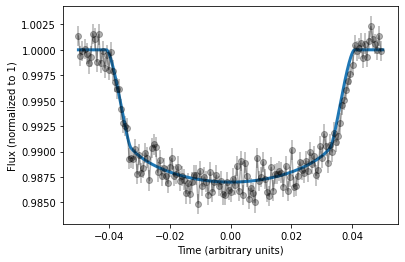

In [18]:
from pytransit import RoadRunnerModel
from astropy import units as u
from astropy import constants
# adapted from https://github.com/hpparvi/PyTransit/blob/master/notebooks/roadrunner/roadrunner_model_example_1.ipynb
times = np.linspace(-0.05, 0.05, 1500)
tm = RoadRunnerModel('nonlinear')
tm.set_data(times)


# Thing for you to tweak!!!
radius_of_planet = 1.05 * constants.R_jup
eccentricity = .18
###

radius_of_star = 10*constants.R_jup
radius_ratio = (radius_of_planet/radius_of_star).decompose()
flux_versus_time = tm.evaluate(k=radius_ratio, ldc=[0.36, 0.04, 0.1, 0.05], t0=0.0, p=1.0, a=4.3, 
                               i=0.5*np.pi, e=eccentricity, w=0.0)


data = np.loadtxt('transit_data.dat')
plt.figure()
plt.plot(times, flux_versus_time, lw=3)
plt.errorbar(data[:, 1], data[:, 0], yerr=0.001, marker='o', color='k', alpha=0.3)
plt.ylabel('Flux (normalized to 1)')
plt.xlabel('Time (arbitrary units)')
plt.show()